https://www.kaggle.com/datasets/arjunbhasin2013/ccdata/code

# Import

In [574]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
import scipy.cluster.hierarchy as sch 
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score

# PD Setting


In [575]:
# 显示所有列
pd.set_option('display.max_columns', None)
# 显示所有行
pd.set_option('display.max_rows', None)
#显示宽度
pd.set_option('display.width', 2000)
pd.set_option('display.max_colwidth',2000 )
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)

# Load Data

In [576]:
#load data
train_path ="./data/CC GENERAL.csv"
train_data = pd.read_csv(train_path)
print('实验数据大小:',train_data.shape)

实验数据大小: (8950, 18)


# EDA

* CUST_ID : Identification of Credit Card holder (Categorical)
* BALANCE : Balance amount left in their account to make purchases 
* BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES : Amount of purchases made from account
* ONEOFF_PURCHASES : Maximum purchase amount done in one-go
* INSTALLMENTS_PURCHASES : Amount of purchase done in installment
* CASH_ADVANCE : Cash in advance given by the user
* PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently * purchased)
* ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
* CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
* PURCHASES_TRX : Numbe of purchase transactions made
* CREDIT_LIMIT : Limit of Credit Card for user
* PAYMENTS : Amount of Payment done by user
* MINIMUM_PAYMENTS : Minimum amount of payments made by user
* PRCFULLPAYMENT : Percent of full payment paid by user
* TENURE : Tenure of credit card service for user








1. **CUST_ID**：信用卡持有者的识别码（类别型数据）。用于唯一标识每一个信用卡用户。

2. **BALANCE**：账户中剩余可用于购买的余额金额。表示信用卡账户中的可用资金。

3. **BALANCE_FREQUENCY**：余额更新的频率，取值在0到1之间（1表示经常更新，0表示很少或不更新）。反映了账户余额被更新的频繁程度。

4. **PURCHASES**：从账户中进行购买的总金额。代表了用户使用信用卡进行消费的总额。

5. **ONEOFF_PURCHASES**：一次性最大购买金额。指用户单次最大的一笔消费额。

6. **INSTALLMENTS_PURCHASES**：分期付款购买的金额。表示用户选择分期付款方式进行消费的总额。

7. **CASH_ADVANCE**：用户预支的现金金额。指信用卡用户提前取出的现金数额。

8. **PURCHASES_FREQUENCY**：购买行为发生的频率，分数在0到1之间（1表示频繁购买，0表示很少或不购买）。反映了用户的购买活跃度。

9. **ONEOFF_PURCHASES_FREQUENCY**：一次性购买行为发生的频率（1表示频繁发生，0表示很少发生）。显示了一次性大额消费的频繁程度。

10. **PURCHASES_INSTALLMENTS_FREQUENCY**：分期付款购买行为发生的频率（1表示频繁发生，0表示很少发生）。展示了用户使用分期付款方式购物的频繁程度。

11. **CASH_ADVANCE_FREQUENCY**：预支现金行为发生的频率。反映了用户利用信用卡预支现金的行为频繁程度。

12. **CASH_ADVANCE_TRX**：使用“现金预支”进行的交易次数。记录了用户通过信用卡提取现金的次数。

13. **PURCHASES_TRX**：购买交易的次数。统计了用户使用信用卡进行购买的交易笔数。

14. **CREDIT_LIMIT**：信用卡用户的信用额度。指银行给予用户的最高可透支额度。

15. **PAYMENTS**：用户已支付的金额。记录了用户向信用卡账户偿还的金额总数。

16. **MINIMUM_PAYMENTS**：用户支付的最低还款额。指的是用户每月必须偿还的最低金额，以避免额外费用或处罚。

17. **PRC_FULL_PAYMENT**：全额支付的比例。显示了用户每月还清全部欠款的比例。

18. **TENURE**：用户使用信用卡服务的期限。指用户成为该信用卡客户的时间长度，通常以月为单位。


In [577]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [578]:
train_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


display 查看所有columns

In [579]:
display(train_data.columns)

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'], dtype='object')

In [580]:
train_data.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


isnull().sum()

用来表示数据中的缺失值

In [581]:

missing_values = train_data.isnull().sum()

# 查看缺失值
missing_values[missing_values > 0]


# 查看某列包含缺失值（NaN）的前几条记录
train_data[train_data['MINIMUM_PAYMENTS'].isnull()].head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.0,1499.0,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.0,97.0,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.0,0.0,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.0,0.0,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.9,1283.9,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12


In [582]:
print('***data missing num***')
MISSING_COLS =[]
for col in train_data.columns:
    m = train_data[col].isnull().sum()
    if m>0:
        missing_ratio = m / len(train_data)
        print(col,':',m,'--' ,f'{missing_ratio:.4f}')
        MISSING_COLS.append(col)

print('MISSING_COLS:',len(MISSING_COLS))


        

***data missing num***
CREDIT_LIMIT : 1 -- 0.0001
MINIMUM_PAYMENTS : 313 -- 0.0350
MISSING_COLS: 2


.nunique()

用于返回对象中除 NA/null 值外的不同(unique)的非重复值的数量。

In [583]:
train_data.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

Distplot combines the matplotlib.hist function with seaborn kdeplot().

KDE Plot represents the Kernel Density Estimate.

KDE is used for visualizing the Probability Density of a continuous variable.

KDE demonstrates the probability density at different values in a continuous variable

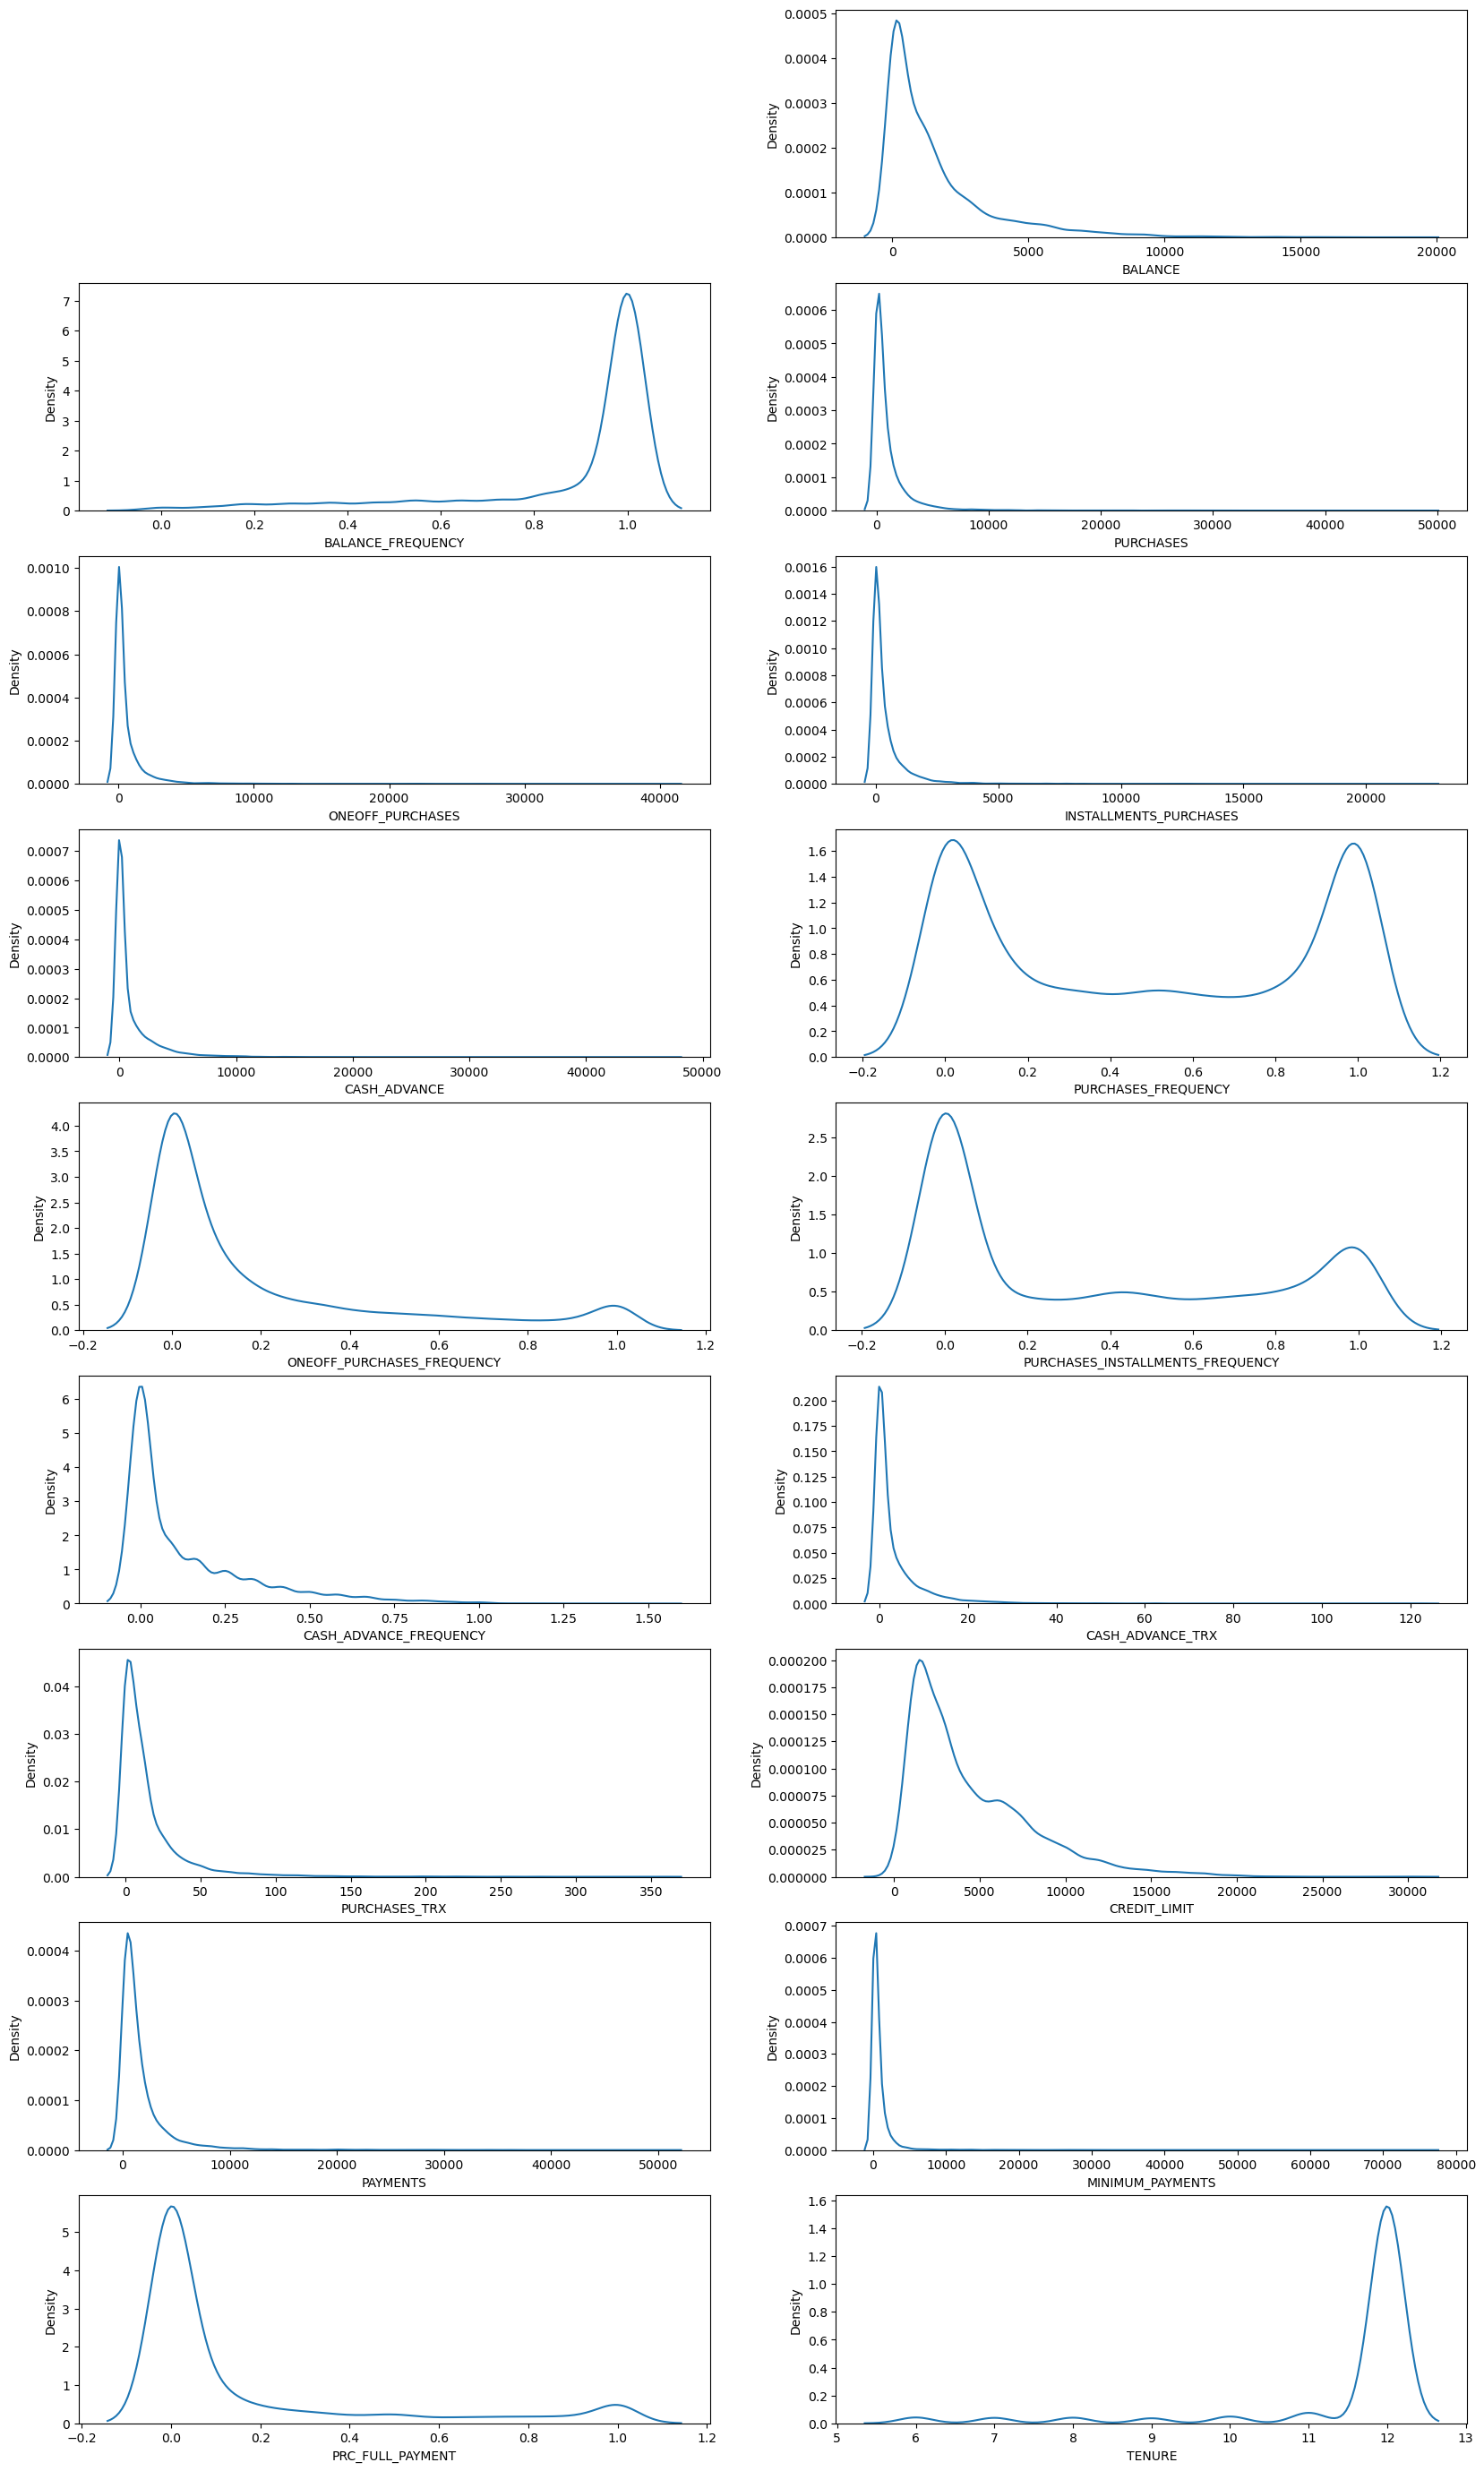

In [584]:
plt.figure(figsize=(20,35))
for i, col in enumerate(train_data.columns):
    if train_data[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(train_data[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

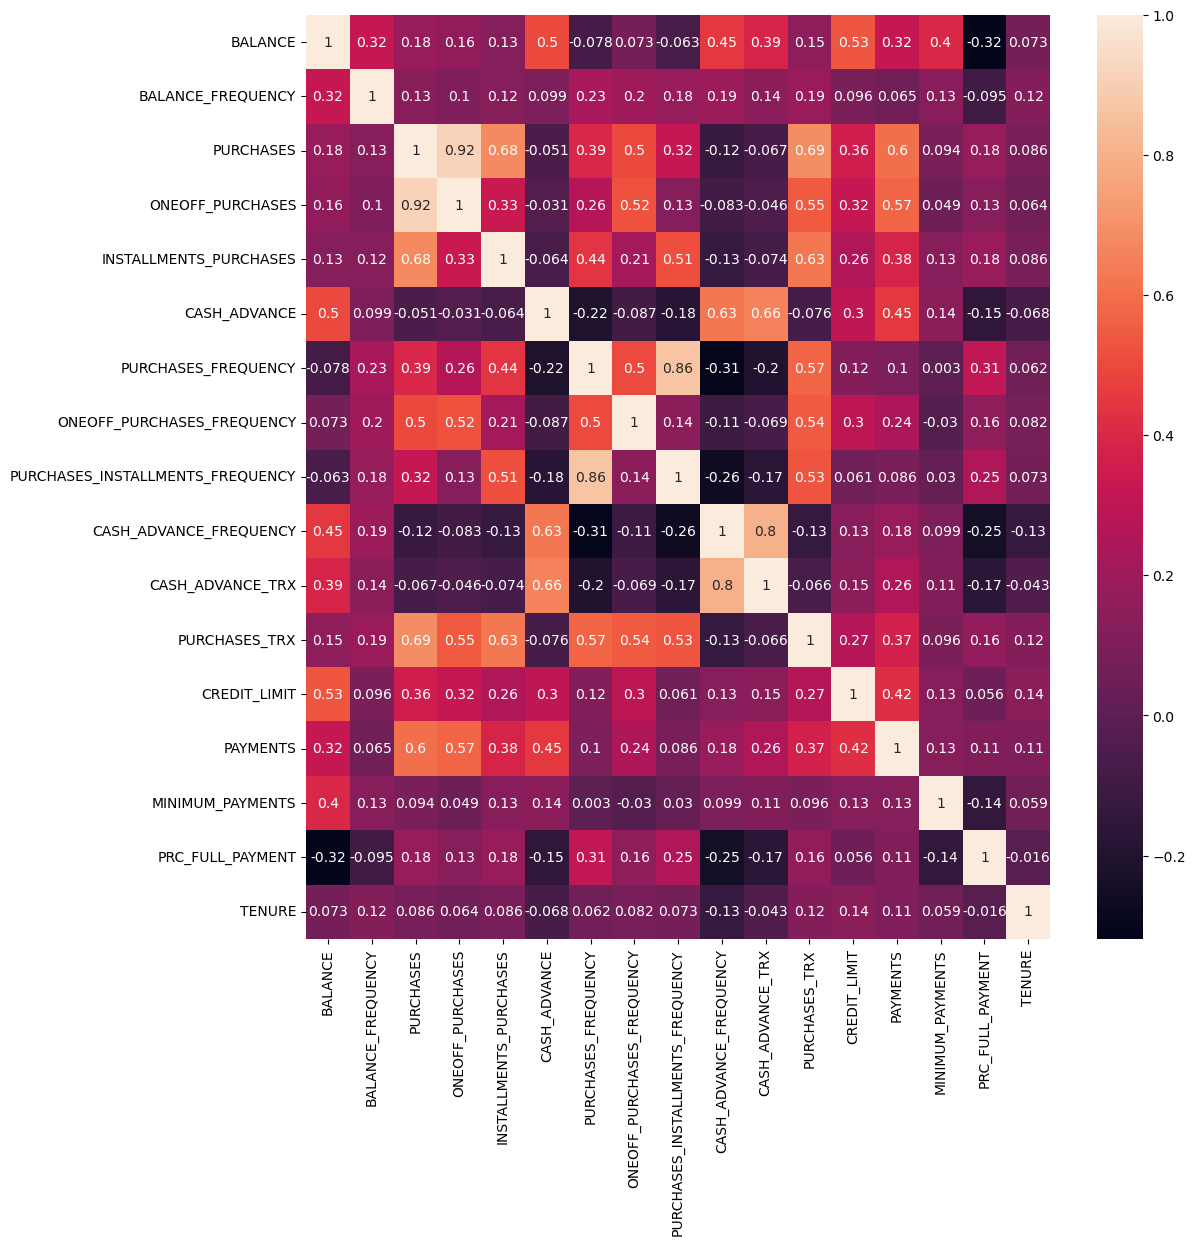

In [585]:
plt.figure(figsize=(12,12))
sns.heatmap(train_data.drop('CUST_ID', axis=1).corr(), annot=True)
plt.show()

BALANCE 和 CASH_ADVANCE、CREDIT_LIMIT 相关系数为 0.5，说明信用卡余额与现金预支金额、额度有较强的正相关关系。





消费行为：PURCHASES、ONEOFF_PURCHASES、INSTALLMENTS_PURCHASES 这些变量之间存在较高的正相关性，说明客户的消费行为具有一定的连贯性和一致性。 

• 信用管理：CREDIT_LIMIT 和 PAYMENTS、MINIMUM_PAYMENTS 之间的相关性较高，表明信用额度与客户的还款行为密切相关。

• 风险评估：BALANCE 和 CASH_ADVANCE 的正相关性提示我们，高余额的客户可能更倾向于使用现金预支功能，这可能对风险评估有一定的参考价值。

Visualize the relationship between features

# Data Process

In [586]:

print(train_data['MINIMUM_PAYMENTS'].mean(),
      train_data['MINIMUM_PAYMENTS'].median()
)

     
print( train_data['MINIMUM_PAYMENTS'].mode())

864.2065423050828 312.343947
0    299.351881
Name: MINIMUM_PAYMENTS, dtype: float64


In [587]:
train_data['MINIMUM_PAYMENTS'].fillna(train_data['MINIMUM_PAYMENTS'].median(), inplace=True)

In [588]:
train_data = train_data.drop('CUST_ID', axis=1)
train_data = train_data.dropna(subset=['CREDIT_LIMIT'])

In [589]:


scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(train_data), columns=train_data.columns)

In [590]:
df_standardized.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.302425,-0.525588,0.360541
1,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.097455,0.234159,0.360541
2,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.093329,-0.525588,0.360541
3,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.228336,-0.525588,0.360541
4,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.257294,-0.525588,0.360541


In [591]:
df_standardized.isnull().sum()


BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

[2.72951331e-01 2.03143936e-01 8.81230235e-02 7.48047159e-02
 6.22536932e-02 5.73945620e-02 4.88380094e-02 4.29857745e-02
 3.79988506e-02 3.08007656e-02 2.37238129e-02 1.77346091e-02
 1.42796504e-02 1.21690287e-02 1.01269862e-02 2.67056640e-03
 6.85241052e-07]


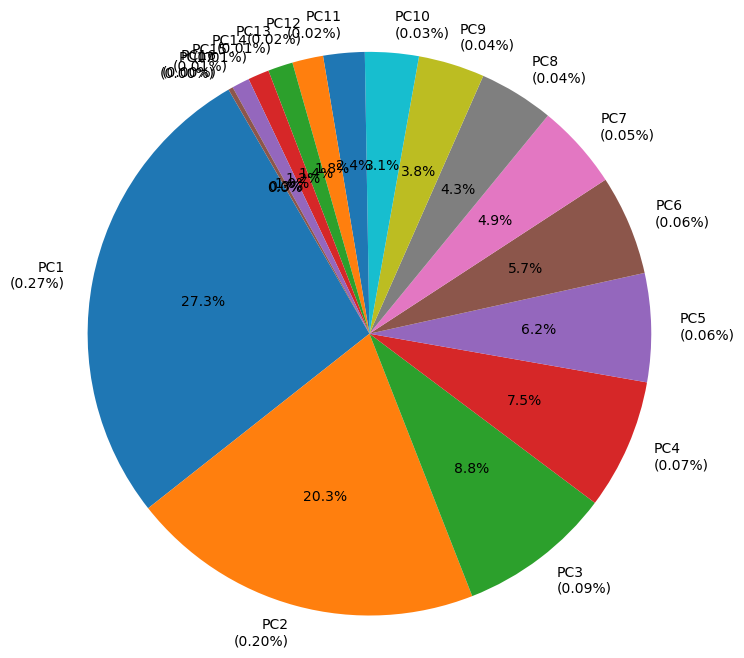

In [592]:




pca = PCA()
pca.fit(df_standardized)
# 了解每个主成分（Principal Component, PC）解释原始数据方差的比例
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

# Explained Variance Ratio by Principal Components
plt.figure(figsize=(8, 8))
plt.pie(explained_variance_ratio, 
        labels=[f'PC{i+1}\n({var:.2f}%)' for i, var in enumerate(explained_variance_ratio)], 
        autopct='%1.1f%%', 
        startangle=120)
plt.axis('equal') 
plt.show()

In [593]:


pca = PCA(n_components=8)
pca_result = pca.fit_transform(df_standardized)


Find the Optimal Number of Clusters Using Elbow Method

c:\Users\SEELE\.conda\envs\python_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\SEELE\.conda\envs\python_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\SEELE\.conda\envs\python_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\SEELE\.conda\envs\python_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

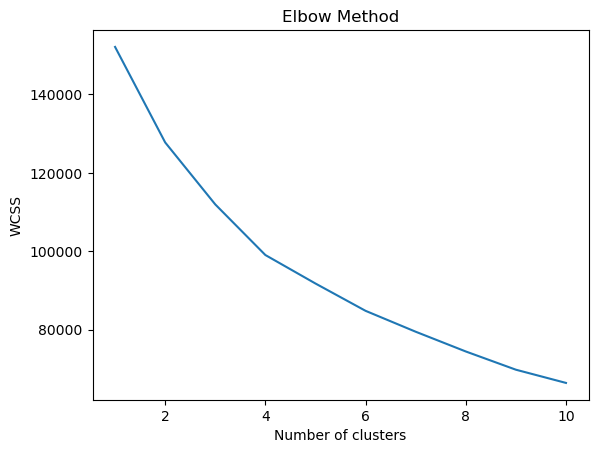

In [594]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_standardized)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [595]:
optimal_k =4

After reducing the dimensionality to two-dimensional space through t-SNE, it is visually displayed according to different cluster labels. In this way, the distribution and aggregation between each cluster can be intuitively seen.

In [596]:
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(pca_result)

In [597]:
def view_clustering_result(modelname,lables):
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=lables , cmap='coolwarm', alpha=0.6)
    plt.xlabel('tsne Component 1')
    plt.ylabel('tsne Component 2')
    plt.title(f'{modelname} Clustering Results with tsne')
    unique_labels = set(lables)
    legend_labels = [f"Cluster {label}" if label != -1 else "Outliers" for label in unique_labels]
    handles, _ = scatter.legend_elements()
    plt.legend(handles, legend_labels, title="Clusters")
    plt.grid()
    plt.show()
    

c:\Users\SEELE\.conda\envs\python_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


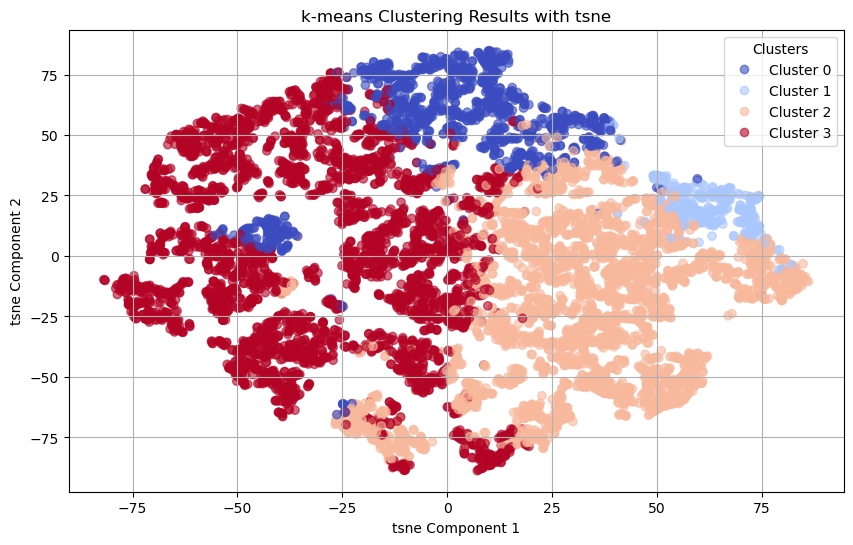

In [598]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_lables= kmeans.fit_predict(pca_result)
view_clustering_result('k-means',kmeans_lables)

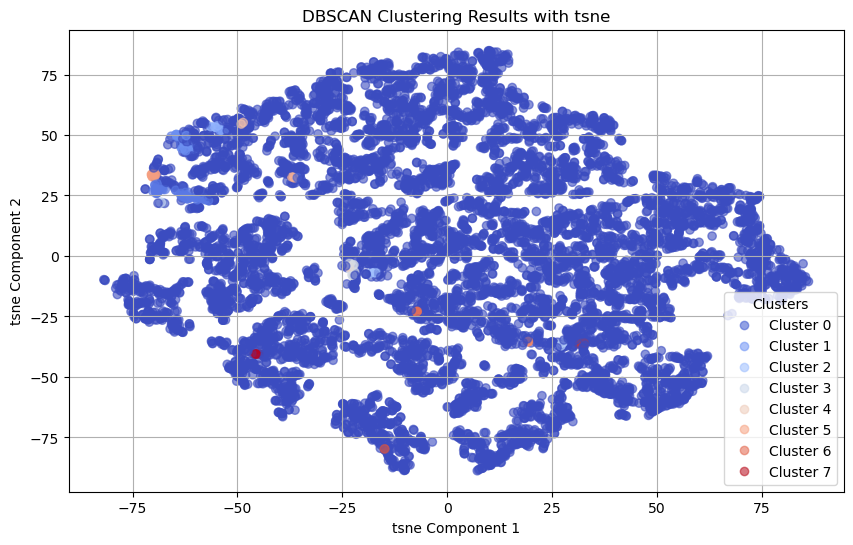

In [629]:
EPS = 0.1

min_samples = 5
dbscan = DBSCAN(eps=EPS,min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(pca_result)

view_clustering_result('DBSCAN',dbscan_labels)

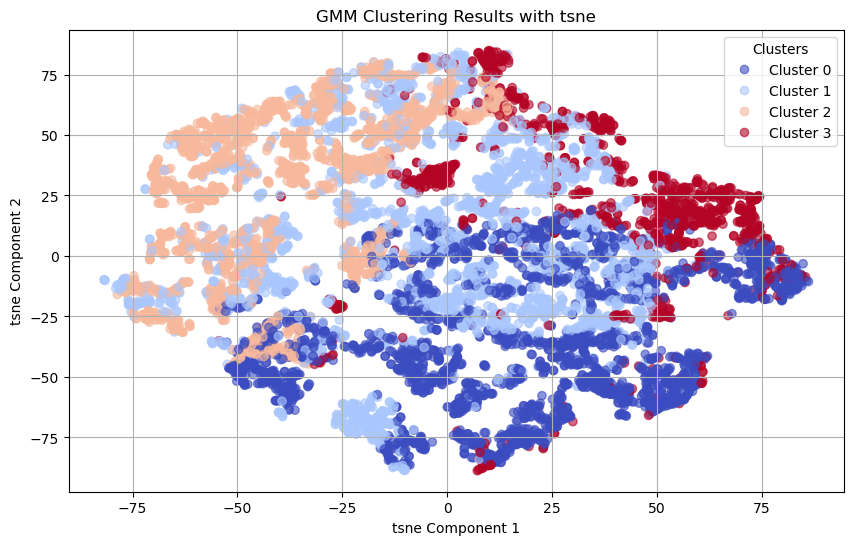

In [600]:
gmm = GaussianMixture(n_components = optimal_k) 
gmm_labels = gmm.fit_predict(pca_result)
view_clustering_result('GMM',gmm_labels)

# Analysis

Generate a histogram for each cluster to help understand the distribution characteristics of each feature within different clusters

In [601]:

def distribution_cluster(labels):
    clusters = pd.concat([train_data, pd.DataFrame({'cluster': labels})], axis=1)
    print(clusters.head(5))
    
    # 遍历除了'cluster'以外的所有列
    for c in clusters.columns.drop('cluster'):
        grid = sns.FacetGrid(clusters, col='cluster')
        grid.map(plt.hist, c)
        plt.show()  

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster
0    40.900749           0.818182      95.40              0.00                    95.4      0.000000             0.166667                    0.000000                          0.083333                0.000000               0.0            2.0        1000.0   201.802084        139.509787          0.000000    12.0      0.0
1  3202.467416           0.909091       0.00              0.00                     0.0   6442.945483             0.000000                    0.000000                          0.000000                0.250000               4.0            0.0        7000.0  4103.032597       1072.340217          0.222222    12.0      1.0
2  2495.148862           1.000000    

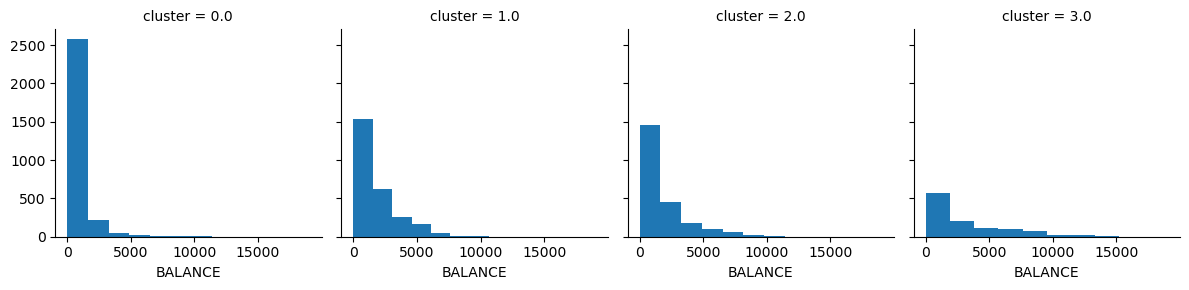

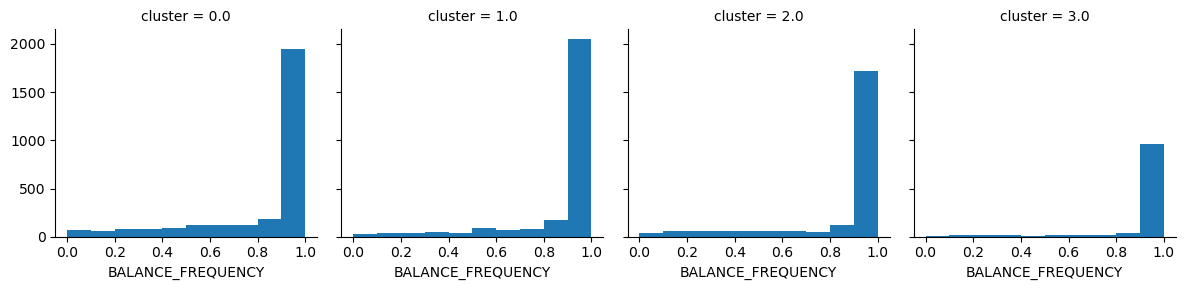

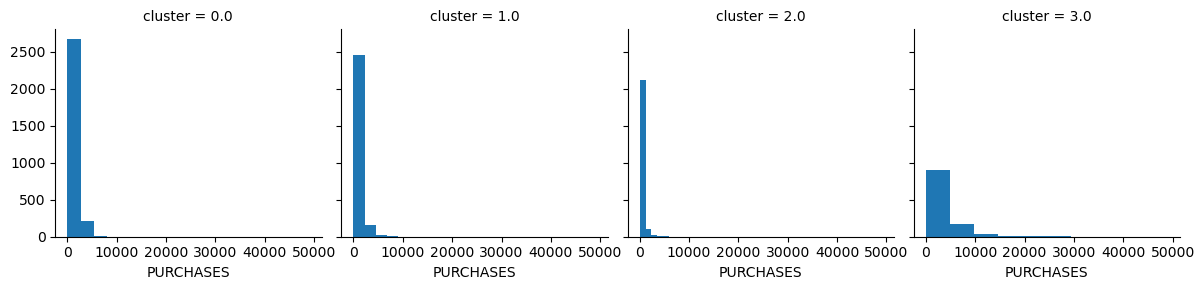

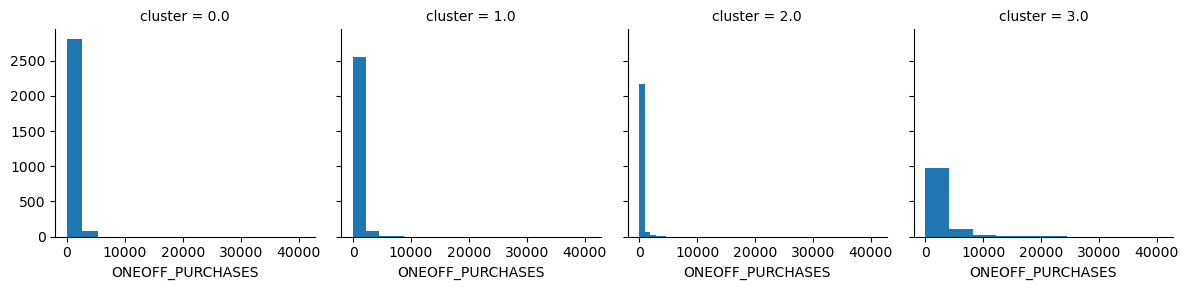

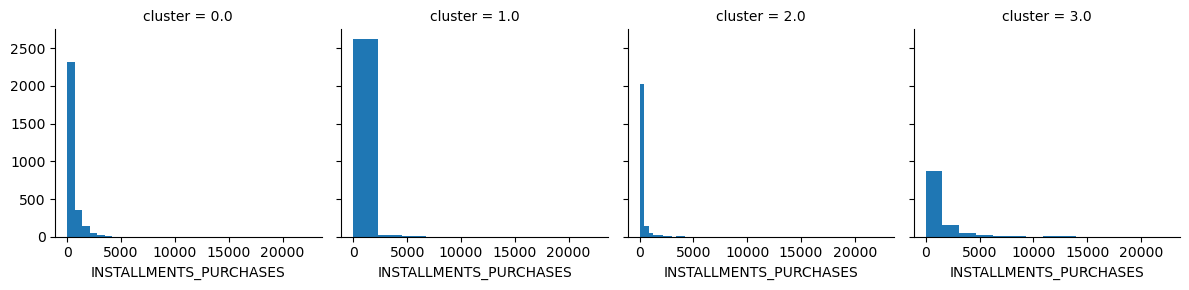

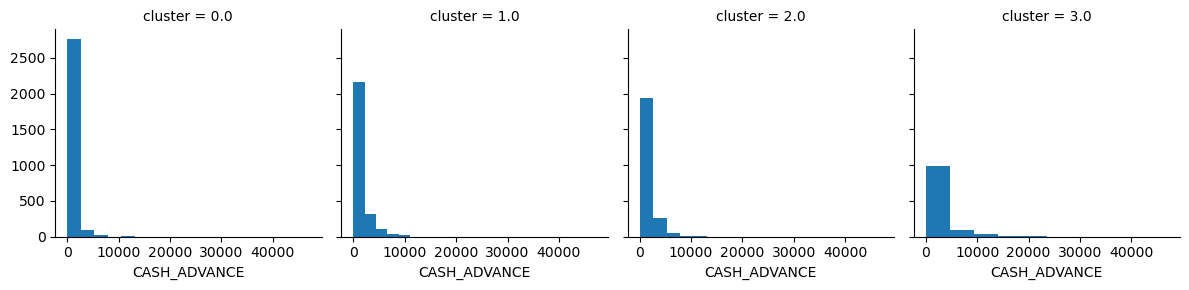

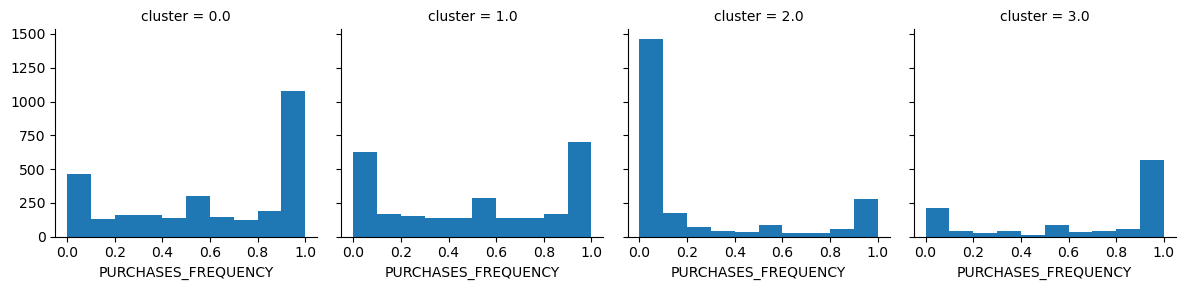

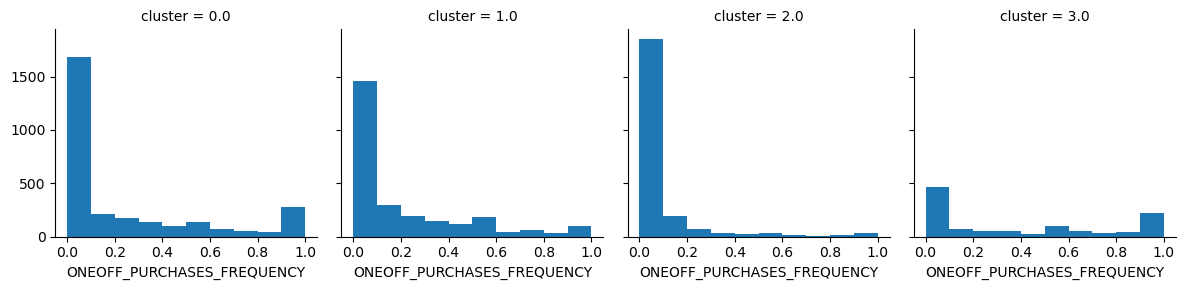

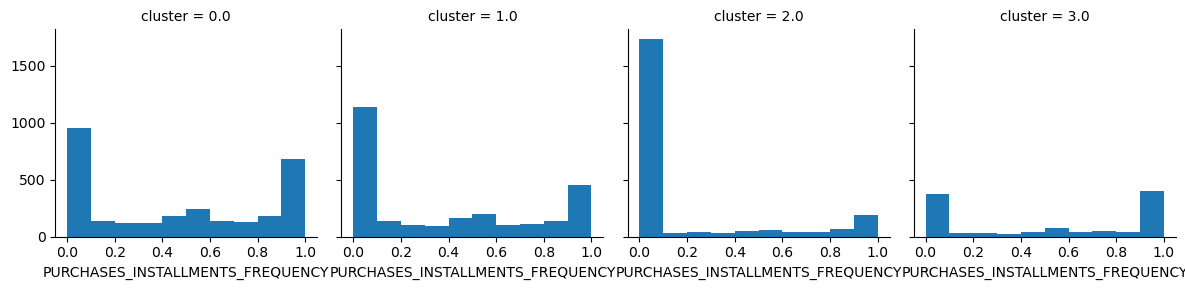

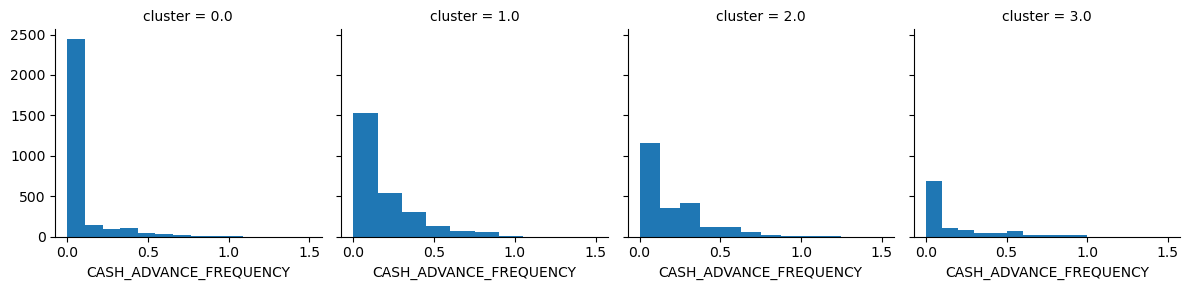

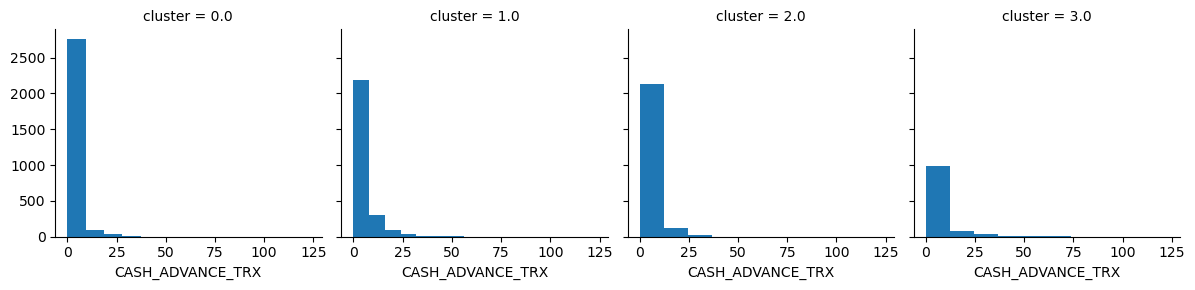

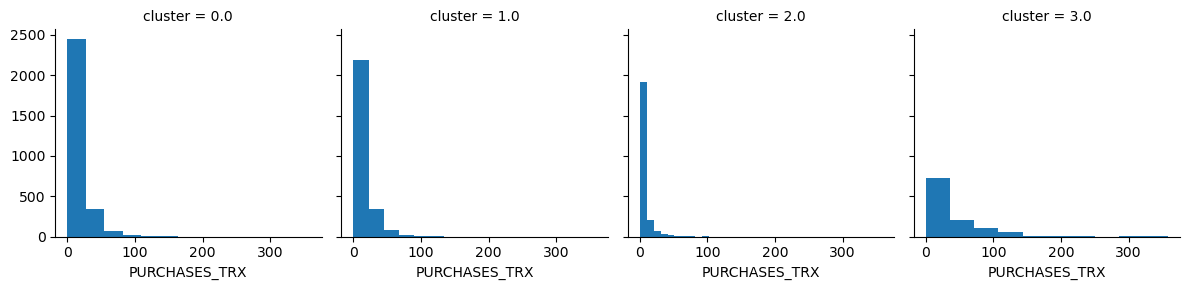

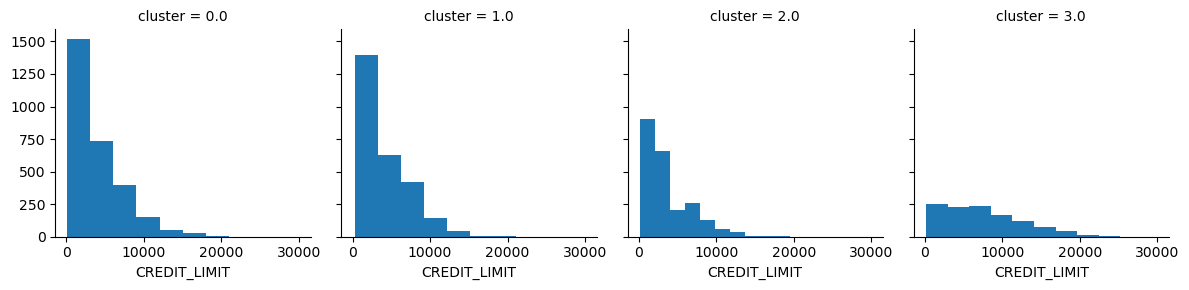

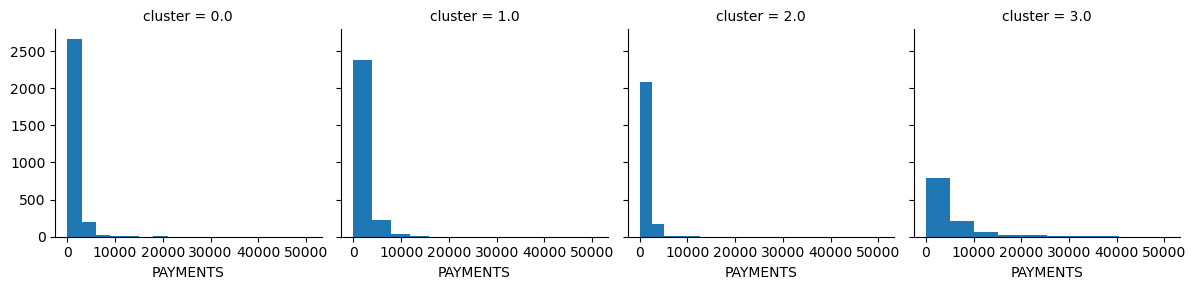

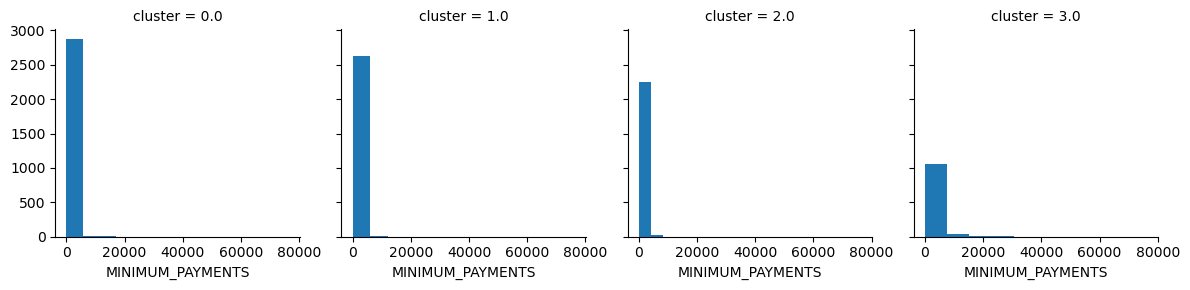

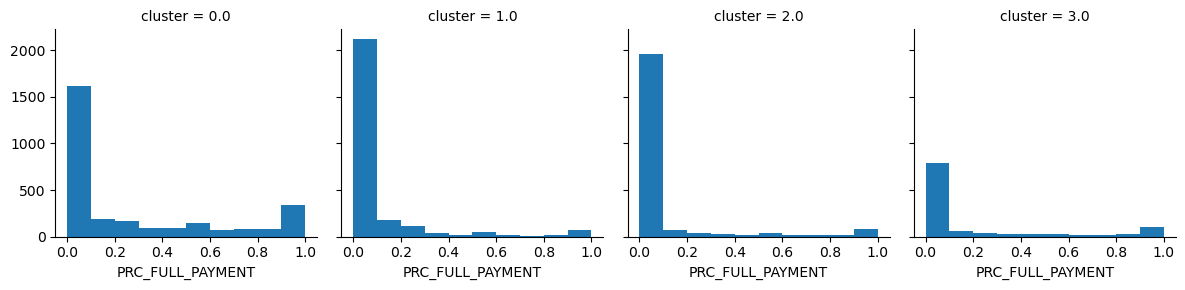

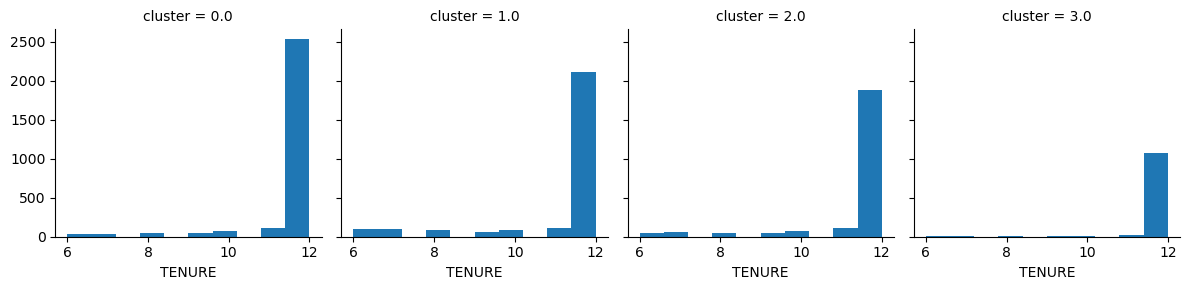

In [ ]:
distribution_cluster(kmeans_lables)


In [ ]:
def view_feature_boxplot(feature,lables):
    clusters=pd.concat([train_data, pd.DataFrame({'cluster':lables})], axis=1)
    plt.figure(figsize=(15,6))
    sns.boxplot(x='cluster', y=feature, data=clusters)


In [ ]:
view_feature_boxplot('PURCHASES_FREQUENCY',kmeans_lables)

Cluster 0.0 和 Cluster 2.0 的用户具有较高的购买频率，其中 Cluster 0.0 的用户购买频率最高，大多数用户的购买频率接近或等于 1.0。这表明这些用户可能是频繁购物者，可能对促销活动和新产品发布非常敏感。

Cluster 1.0 和 Cluster 3.0 的用户具有较低的购买频率，其中 Cluster 3.0 的用户购买频率最低，大多数用户的购买频率在 0.2 到 0.4 之间。这表明这些用户可能是偶尔购物者，可能更倾向于计划性消费或对价格更为敏感。

Cluster 2.0 存在一些异常值，这些用户的购买频率明显低于该簇的其他用户，可能需要进一步分析这些异常值的原因，例如是否是数据错误、特殊事件影响等。

# DBSCAN